### This code is designed to visualize the distribution of amino acid and protein features from a dataset. Histograms are generated for each feature (column) in both amino acid and protein datasets. 

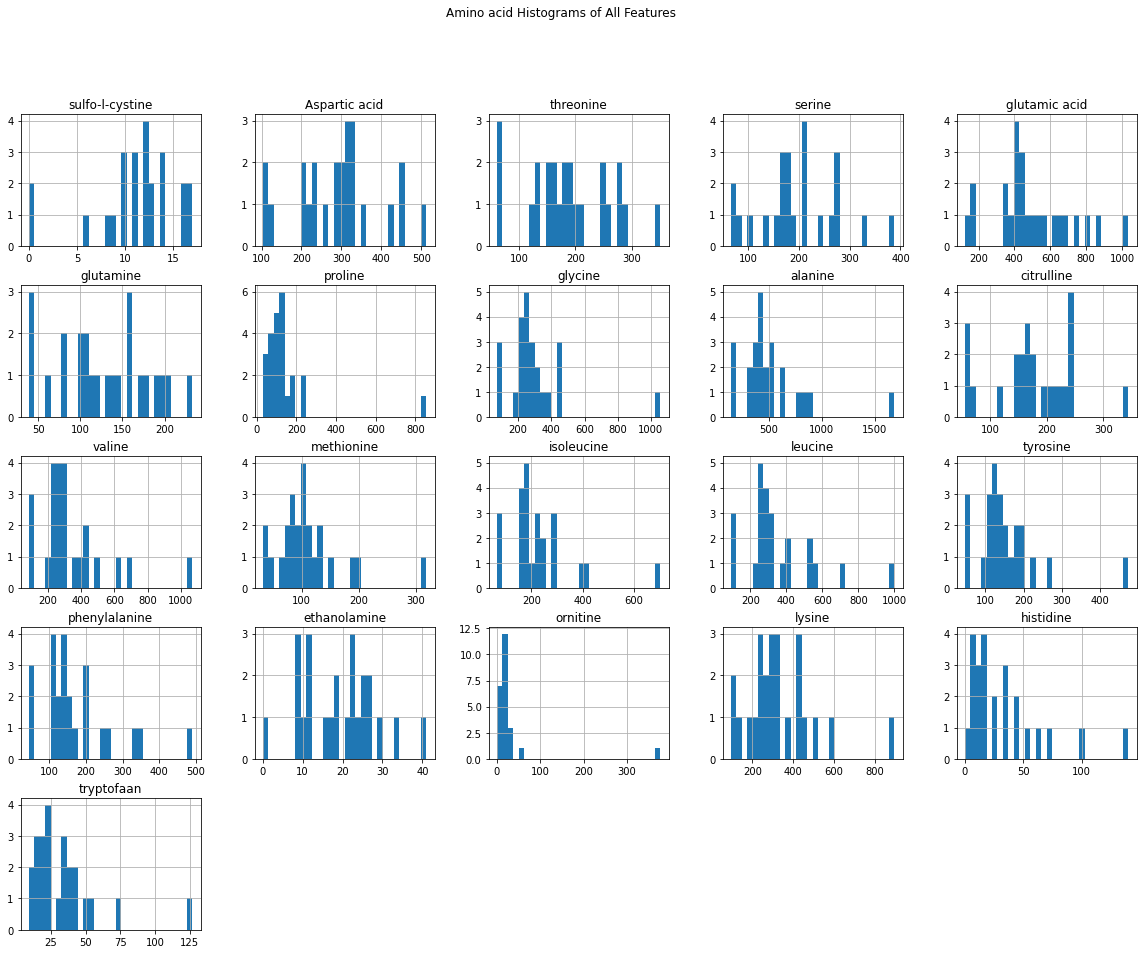

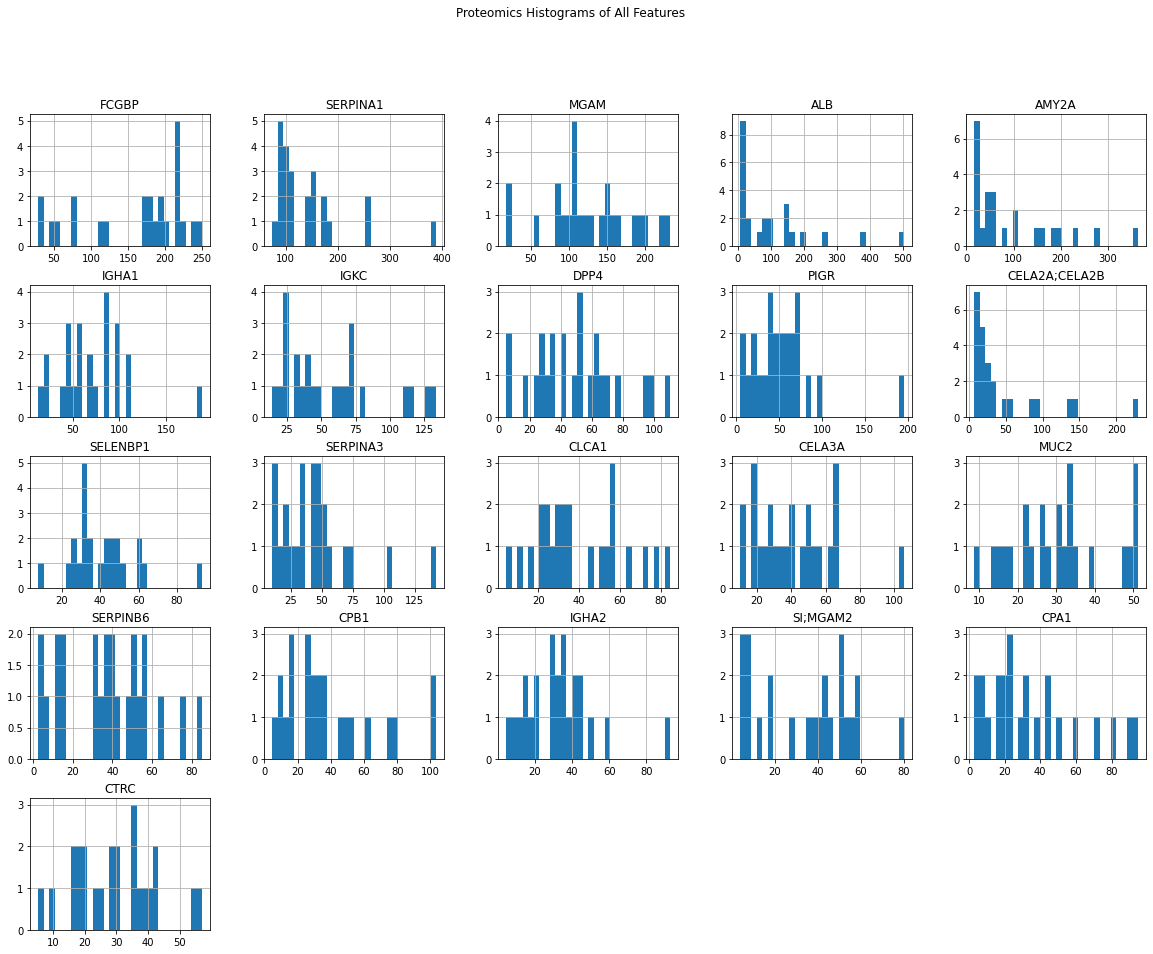

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)

# Separate the dataset into amino acids and proteins
df_amino = df.iloc[:, 0:21]
df_prot = df.iloc[:, 21:42]

df_amino.hist(figsize=(20, 15), bins=30)
plt.suptitle('Amino acid Histograms of All Features')
plt.show()

df_prot.hist(figsize=(20, 15), bins=30)
plt.suptitle('Proteomics Histograms of All Features')
plt.show()

X-Axis: Range of values for each feature (amino acid or protein).
Y-Axis: Number of observations (frequency) that fall within each bin of the x-axis range.

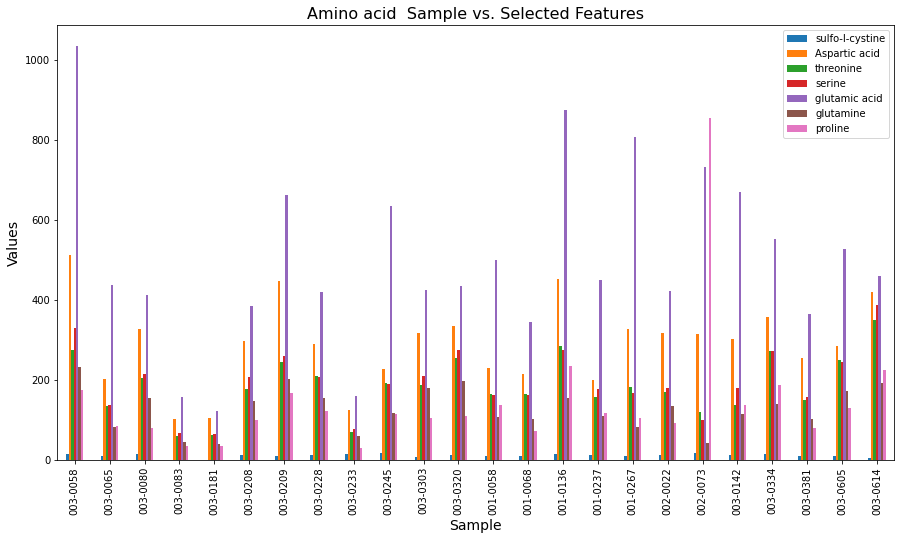

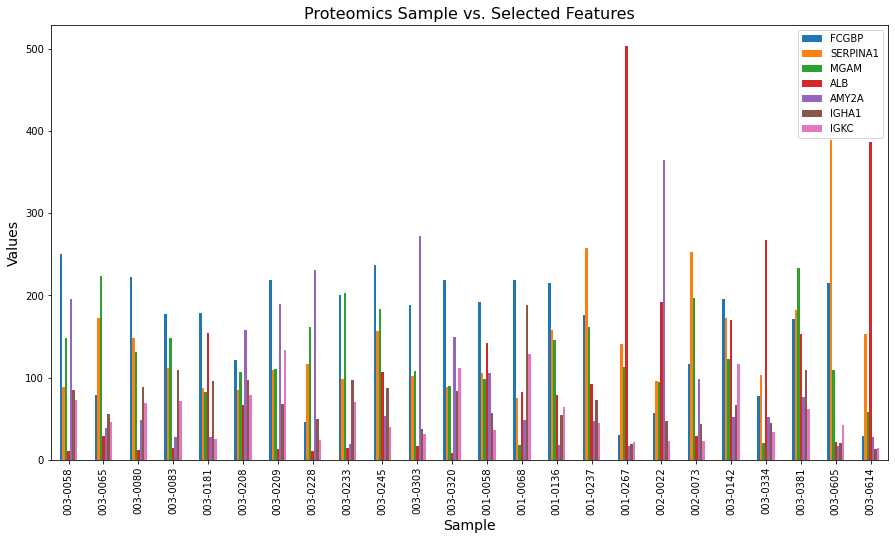

In [9]:
import pandas as pd
import scipy.stats as stats

# Load the dataset and separate it into amino acids and proteins
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)

# Separate the dataset into amino acids and proteins
df_amino = df.iloc[:, 0:21]
df_prot = df.iloc[:, 21:]



# Select a subset of features to plot (for demonstration purposes, we'll use the first 5)
selected_features = df_amino.columns[0:7]  # Adjust the range as needed

# Plot each selected feature against the first column (Sample)
df_amino[selected_features].plot(kind='bar', figsize=(15, 8))

# Set the plot title and labels
plt.title('Amino acid  Sample vs. Selected Features', fontsize=16)
plt.xlabel('Sample', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Show the plot
plt.show()

# -------------------------

# Select a subset of features to plot (for demonstration purposes, we'll use the first 5)
selected_features = df_prot.columns[0:7]  # Adjust the range as needed

# Plot each selected feature against the first column (Sample)
df_prot[selected_features].plot(kind='bar', figsize=(15, 8))

# Set the plot title and labels
plt.title('Proteomics Sample vs. Selected Features', fontsize=16)
plt.xlabel('Sample', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Show the plot
plt.show()


In [9]:
import pandas as pd
import scipy.stats as stats

# Load the dataset and separate it into amino acids and proteins
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)

# Separate the dataset into amino acids and proteins
df_amino = df.iloc[:, 0:21]
df_prot = df.iloc[:, 21:]

# Inspect the DataFrames
print("Amino Acid DataFrame Head:\n", df_amino.head())
print("\nProtein DataFrame Head:\n", df_prot.head())

# Perform statistical tests to identify significant associations with colon cancer
def analyze_biomarkers(df_subset, target):
    results = []
    for col in df_subset.columns:
        cancer_group = df_subset[target == 1][col].dropna()
        healthy_group = df_subset[target == 0][col].dropna()
        
        print(f"\nAnalyzing biomarker: {col}")
        print(f"Cancer group size: {len(cancer_group)}, Healthy group size: {len(healthy_group)}")
        
        # Perform a t-test if both groups have data
        if not cancer_group.empty and not healthy_group.empty:
            stat, p_value = stats.ttest_ind(cancer_group, healthy_group, equal_var=False)
            results.append({'Biomarker': col, 'Statistic': stat, 'p_value': p_value})
        else:
            print(f"No sufficient data for comparison in biomarker: {col}")
    
    return pd.DataFrame(results)

# Analyze amino acids and proteins separately
results_amino = analyze_biomarkers(df_amino, target)
results_prot = analyze_biomarkers(df_prot, target)

# Check the results DataFrame
print("\nResults DataFrame (Amino Acids):\n", results_amino)
print("\nResults DataFrame (Proteins):\n", results_prot)

# Filter significant results (e.g., p_value < 0.05)
try:
    significant_amino = results_amino[results_amino['p_value'] < 0.05]
    significant_prot = results_prot[results_prot['p_value'] < 0.05]
    
    print("\nSignificant Amino Acids Associated with Colon Cancer:\n", significant_amino)
    print("\nSignificant Proteins Associated with Colon Cancer:\n", significant_prot)
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available columns in results_amino:", results_amino.columns)
    print("Available columns in results_prot:", results_prot.columns)


Amino Acid DataFrame Head:
           sulfo-l-cystine  Aspartic acid  threonine  serine  glutamic acid  \
Sample                                                                       
003-0058               14            513        275     331           1036   
003-0065                9            202        135     137            437   
003-0080               16            327        205     214            412   
003-0083                0            103         61      67            157   
003-0181                0            106         62      65            123   

          glutamine  proline  glycine  alanine  citrulline  ...  methionine  \
Sample                                                      ...               
003-0058        233      176      441      792         344  ...         196   
003-0065         83       84      181      308         114  ...          73   
003-0080        156       81      249      459         210  ...         122   
003-0083         44       35  

Analyzing biomarker: PRSS1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: PRSS1

Analyzing biomarker: A2M
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: A2M

Analyzing biomarker: MEP1B
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: MEP1B

Analyzing biomarker: DPEP1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: DPEP1

Analyzing biomarker: SERPINB1;SERPINB9;SERPINI2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: SERPINB1;SERPINB9;SERPINI2

Analyzing biomarker: ASAH2;ASAH2B
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: ASAH2;ASAH2B

Analyzing biomarker: ACY1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: ACY1

Analyzing biomarker: JCHAIN
Cancer group size: 0, Healthy group size


Analyzing biomarker: KRT9
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: KRT9

Analyzing biomarker: HLA-DRA;HLA-DQA2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: HLA-DRA;HLA-DQA2

Analyzing biomarker: RBP4
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: RBP4

Analyzing biomarker: CA4
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: CA4

Analyzing biomarker: PRSS8
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: PRSS8

Analyzing biomarker: IGHV3-72
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: IGHV3-72

Analyzing biomarker: HLA-DRB1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: HLA-DRB1

Analyzing biomarker: SGSH
Cancer group size: 0, Healthy group size: 0
No sufficient data fo

Analyzing biomarker: COL4A2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: COL4A2

Analyzing biomarker: NPC2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: NPC2

Analyzing biomarker: IGHV3-49
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: IGHV3-49

Analyzing biomarker: IGHV1-18
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: IGHV1-18

Analyzing biomarker: A1BG
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: A1BG

Analyzing biomarker: ELANE
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: ELANE

Analyzing biomarker: AZU1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: AZU1

Analyzing biomarker: MDH2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in bio

Analyzing biomarker: RNASE3
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: RNASE3

Analyzing biomarker: PKM;PKLR
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: PKM;PKLR

Analyzing biomarker: CALR
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: CALR

Analyzing biomarker: TKT
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: TKT

Analyzing biomarker: PLS1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: PLS1

Analyzing biomarker: GALM
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: GALM

Analyzing biomarker: MUC13
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: MUC13

Analyzing biomarker: NUDT5
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: N

Analyzing biomarker: P4HB
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: P4HB

Analyzing biomarker: SERPINA6
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: SERPINA6

Analyzing biomarker: LTA4H
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: LTA4H

Analyzing biomarker: CEL
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: CEL

Analyzing biomarker: FLNA
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: FLNA

Analyzing biomarker: PSMB9
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: PSMB9

Analyzing biomarker: IMPA1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: IMPA1

Analyzing biomarker: HMGCS2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: 

Analyzing biomarker: AOC1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: AOC1

Analyzing biomarker: SLC26A2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: SLC26A2

Analyzing biomarker: YWHAE
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: YWHAE

Analyzing biomarker: CAMK2D
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: CAMK2D

Analyzing biomarker: FHL1
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: FHL1

Analyzing biomarker: UGP2
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: UGP2

Analyzing biomarker: DHRS9
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: DHRS9

Analyzing biomarker: WDR26
Cancer group size: 0, Healthy group size: 0
No sufficient data for comparison in biomarker: